In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

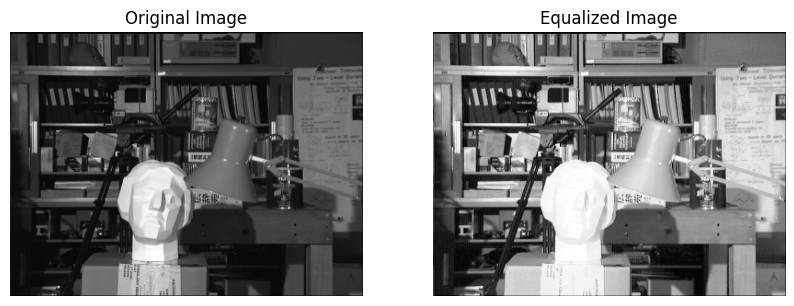

In [2]:
img = cv2.imread('../data/images/statue.png' , 0 )
# Apply histogram equalization
equalized_img = cv2.equalizeHist(img)

# Create figure with 2 subplots
plt.figure(figsize=(10,5))

# Plot original image
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot equalized image 
plt.subplot(1,2,2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()

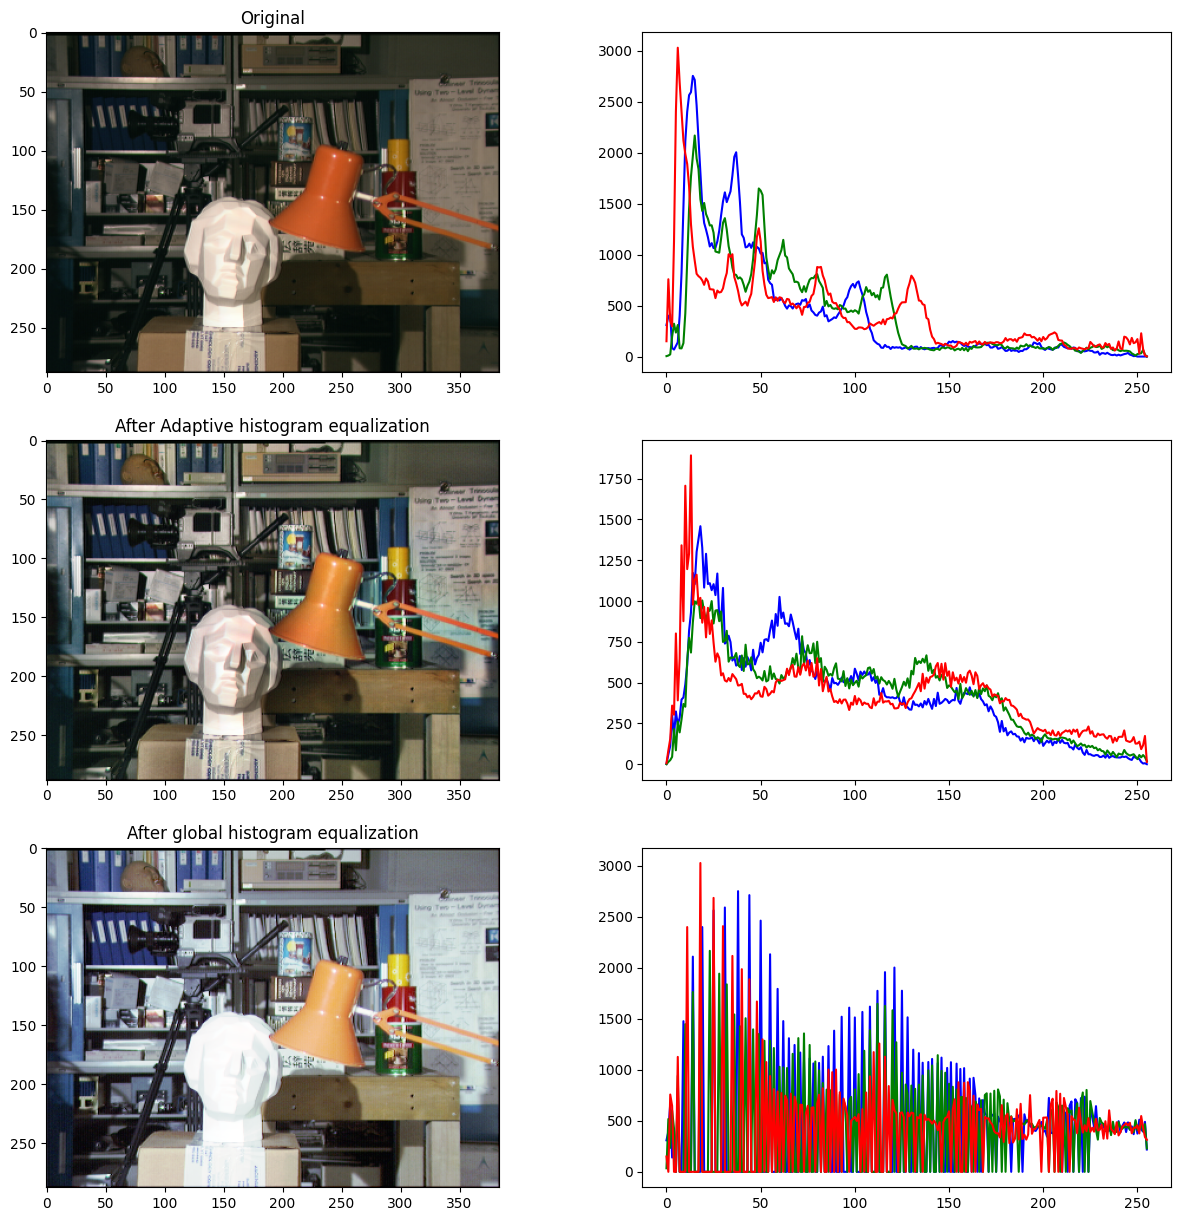

In [3]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('../data/images/statue.png')
###############
# Histogram Equalization
channels = cv2.split(image)

#Adaptive method(CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
eq_channels = []
for ch in channels:
    eq_channels.append(clahe.apply(ch))
eq_clahe_image = cv2.merge(eq_channels)

#Global method
eq_channels = []
for ch in channels:
    eq_channels.append(cv2.equalizeHist(ch))
eq_image = cv2.merge(eq_channels)

#plot images
plt.figure(figsize=[15,15])
plt.subplot(321);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(323);plt.imshow(eq_clahe_image[...,::-1]);plt.title("After Adaptive histogram equalization");
plt.subplot(325);plt.imshow(eq_image[...,::-1]);plt.title("After global histogram equalization");


color = ('b', 'g', 'r')
#Original image histogram
plt.subplot(322);
for i, col in enumerate(color):
    histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)

#Equualized image histogram with Adaptive method
plt.subplot(324);
for i, col in enumerate(color):
    histogram = cv2.calcHist([eq_clahe_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)
    
#Equualized image histogram with Global method
plt.subplot(326);
for i, col in enumerate(color):
    histogram = cv2.calcHist([eq_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)